# SARS-CoV-2 y Minería de Datos

Vimos un poco sobre aminoácidos, proteínas, y por qué el estudio de la proteína Spike es relevante para el entendimiento del SARS-CoV-2. Muchas cosas se saben porque ya tenemos más de un año en pandemia y se han hecho numerosos estudios sobre este virus y la enfermedad que causa. Supongamos que no sabemos mucho del virus y que queremos descubrir cosas por nuestra cuenta.

### Antes que nada... ¿Qué es la Minería de Datos?

La **minería de datos** o exploración de datos es un proceso que intenta descubrir patrones en grandes volúmenes de conjuntos de datos.

### Inicialización

Antes que nada, necesitaremos bajar los datos. En el caso de nuestro taller, bajamos previamente datos de Estados Unidos de la base de datos del [National Center for Biotechnology Information (NCBI)](https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Protein&VirusLineage_ss=Wuhan%20seafood%20market%20pneumonia%20virus,%20taxid:2697049&SLen_i=1273%20TO%201273&Completeness_s=complete&HostLineage_ss=Homo%20sapiens%20(human),%20taxid:9606). Estos pueden ser encontrados en el repositorio de GitHub [SARS-CoV-2 y Minería de Datos](https://github.com/LaMatemaga/SARS-CoV-2-y-Mineria-de-Datos):
- ``Secuencias.zip``: Archivo comprimido con las secuencias en formato fasta
- ``Secuencias.csv``: Archivo con los metadatos de las secuencias

**Nota:** Los datos fueron descargados el día 7 de julio del 2021.

**Paso 1.** Instalar e inicializar paquetería `seqinr`.

**Paso 2.** Leer los datos de las secuencias del virus previamente descargados. El archivo se llama `Secuencias.fasta` y podemos leerla con la función `read.fasta()`. Guardémoslo en la variable `secuencias`.

**Paso 3.** Leer los metadatos de las secuencias del archivo anterior. El archivo se llama `Secuencias.csv` y podemos leerlo con la función `read.csv()`. Guardémoslo en la variable `metaSecuencias`.

### Valores iniciales

**Paso 1.** Sabemos de antemano que la cantidad de aminoácidos en la proteína Spike del SARS-CoV-2 es de `1273`. Guardemos en la variable `tamanioSecuencia` este valor. 

**Paso 2.** No conocemos la cantidad de secuencias que hay en nuestros datos. Sin embargo, es necesario tener esta información. Usemos la función `length()` para conocer la cantidad de secuencias que tenemos y guardemos este valor en la variable `cantidadSecuencias`.

**Paso 3.** De acuerdo a lo que vimos en la introducción, sabemos que hay `20` aminoácidos esenciales y que podemos representarlos con letras. Guardemos en la variable `listaDeAminoacidos` los valores `c("A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V")`, que sabemos son las letras que representan estos aminoácidos y que están contenidas en nuestras secuencias.

**Paso 4.** Para fines de uso en algunos ciclos, guardemos la cantidad de aminoácidos (`20`) dentro de la variable `numeroAminoacidos`. En caso de que no quieras contarlos, también puedes hacer uso de la función `length()`.

### Limpieza de datos 

Muchas veces nos encontraremos con secuencias con información faltante en nuestros datos y que podrían afectar nuestros resultados. Es importante buscar la manera en la que podamos identificarlo usando código para facilitar el análisis. En el caso de nuestros datos es probable que nos encontremos con secuencias así:

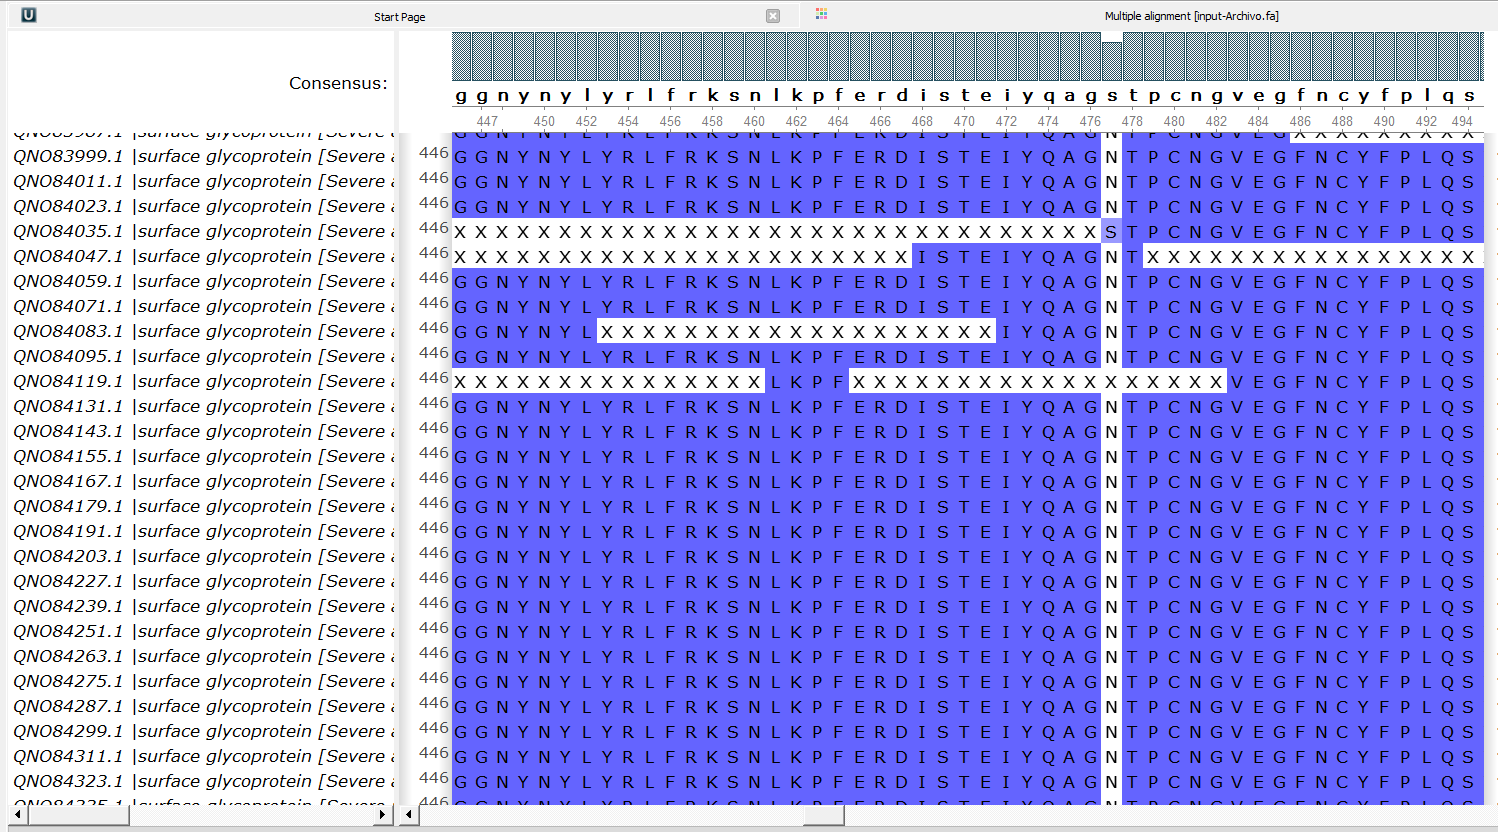

Estas secuencias no nos dicen nada porque las `X` nos están indicando que no conocemos el aminoácido que se encuentra en esa posición. Y si nuestra secuencia tiene muchas `X` es como no conocer gran parte de ella. Establezcamos entonces el límite de tolerancia con el que vamos a permitir ambigüedad en nuestros datos y pongámoslo dentro de la variable `toleranciaAmbiguedad`.

Ya que estableciste el porcentaje de tolerancia de ambigüedad, calcula la cantidad de aminoácidos que esto representa del total de aminoácidos. Utiliza los valores `tamanioSecuencia` y `toleranciaAmbiguedad` y guárdala en la variable `maximaAmbiguedad`.

Este pedazo de código lo que nos hará es eliminar las secuencias (y sus metadatos) que tienen mucha información ambigua.

In [ ]:
i <- 1
while(i<=cantidadSecuencias){
  aux <- 0
  for(j in 1:tamanioSecuencia){
    if(secuencias[[i]][j]=='X'){
      aux <- aux+1
    }
  }
  if(aux>maximoAmbiguedad){
    # Aqui me quita el dato "ambiguo"
    metaSecuencias <- metaSecuencias[metaSecuencias$Accession!=
                                       metaSecuencias$Accession[i],]
    secuencias[i] <- NULL
    cantidadSecuencias <- cantidadSecuencias-1
  }else{
    i <- i+1
  }
  rm(aux)
}
rm(i,j)

### Secuencia consenso

**Paso 1:** Inicializa una matriz de ceros llamada `matrizAux` que tenga `tamanioSecuencia` filas y `numeroAminoacidos` columnas.

**Paso 2:** Renombra las columnas con los nombres de los aminoácidos `listaDeAminoacidos`.

**Paso 3:** Este pedazo de código añadirá 1 dependiendo de lo que encuentre en la secuencia. Ejemplo, si en la secuencia `i` y en la posición de aminoácido `j` encuentra una `'N'` (que está en la posición `k=3` de `listaDeAminoacidos`), entonces sumará un 1 en la fila `j` y columna `k`. Esto nos permitirá después encontrar el aminoácido consenso, o el más común, para cada posición de la secuencia de la proteína.

In [ ]:
for(i in 1:cantidadSecuencias){
  for(j in 1:tamanioSecuencia){
    for(k in 1:numeroAminoacidos){
      if(secuencias[[i]][j]==listaDeAminoacidos[k]){
        matrizAux[j,k] <- matrizAux[j,k]+1
        break
      }
    }
  }
}

Esperaríamos que la suma por filas fuera la misma (es decir, la cantidad de secuencias `cantidadSecuencias` que tenemos). Observemos qué pasa si queremos sumar por filas para ver si esto ocurre.

*Nota:* Si encuentra algo diferente a un elemento de `listaDeAminoacidos`, lo que hicimos en el paso 3 no lo va a contabilizar. Ejemplo, si encuentra una `'X'`. Para éso, tendremos que hacer una corrección.

**Paso 4:** Colocar los valores faltantes en el consenso.

In [ ]:
for(i in 1:tamanioSecuencia){       # Para poner las X en el consenso manualmente
  aux <- cantidadSecuencias-sum(matrizAux[i,])
  index <- which(matrizAux[i,]==max(matrizAux[i,]))
  matrizAux[i,index] <- aux + matrizAux[i,index]
}
rm(aux,index,i)

**Paso 5:** Finalmente, toca calcular la `secuenciaConsenso`. Ésta nos representa los aminoácidos que aparecen con mayor frecuencia en cada posición de nuestra proteína, en este caso la proteína Spike. Primero, inicianicémosla como un vector vacío.

**Paso 6:** Identificar la columna con mayor frecuencia para cada fila como el consenso para esa posición.

In [ ]:
for (i in 1:tamanioSecuencia) {
  for (j in 1:numeroAminoacidos) {
    if (matrizAux[i,j]==max(matrizAux[i,])){
      secuenciaConsenso <- c(secuenciaConsenso,listaDeAminoacidos[j])
    }
  }
}
rm(i,j)

### Revisar las mutaciones por posición

**Paso 1:** Inicializar un vector vacío llamado `mutacionesPorPosicion` para revisar cuántas mutaciones hay por posición en nuestras muestras. 

**Paso 2:** Contarlas.

In [ ]:
for (i in 1:tamanioSecuencia) {
  mutacionesPorPosicion <- c(mutacionesPorPosicion, sum(matrizAux[i,])-max(matrizAux[i,]))
}

*Nota:* Observemos que al corregir el error de las `'X'`, las `'X'` no afectarán el conteo de nuestras mutaciones por posición.

### Visualizar las mutaciones por posición (USA)

**Paso 1:** Utiliza la función `plot()` para hacer una gráfica de puntos de la variable `mutacionesPorPosicion`.

*¿Qué podemos observar?*

**Paso 2:** En biología muchas veces tiene más sentido visualizar el logaritmo de nuestros datos. Hagamos un cambio de variable de nuestro vector `mutacionesPorPocision` y guardémoslo en `logMutacionesPorPocision`.

**Paso 3:** Utiliza la función `plot()` para hacer una gráfica de puntos de la variable `logMutacionesPorPosicion`.

*¿Qué podemos observar?*

### Filtrar las mutaciones por estado

**Paso 1:** ¿Recuerdas que guardamos los metadatos? Podemos filtrar por estado haciendo uso de los metadatos. Para este ejemplo utilizaremos a Michigan (`'MI'`). Guarda `'MI'` en la variable `estado1`.

**Paso 2:** Vamos a crear un filtro con valores lógicos. En este caso, comparemos el vector de la columna `USA` del dataframe `metaSecuencias` para revisar si pertenece o no al estado que guardamos en `estado1`. Guardamos este vector como `filtro1`.

**Paso 3:** Vamos a obtener las mutaciones por posición que ocurren en el `estado1`. Para esto, crearemos un vector llamado `mutacionesPorPosicionEstado1` que contenga `tamanioSecuencia` ceros.

In [ ]:
mutacionesPorPosicionEstado1 <- rep(0,tamanioSecuencia)

Ahora compararemos la `secuenciaConsenso` con cada una de las secuencias dentro del `filtro1` y sumaremos un 1 si encontramos una mutación. Las guardaremos en `mutacionesPorPosicionEstado1`.

In [ ]:
for(i in filtro1){
  for(j in 1:tamanioSecuencia){
    if(secuencias[[i]][j]!=secuenciaConsenso[j]){
      mutacionesPorPosicionEstado1[j] <- mutacionesPorPosicionEstado1[j]+1
    }
  }
}

**Paso 4:** Obtengamos el logaritmo de las mutaciones anteriores y guardémoslo en `logMutacionesPorPosicionEstado1`.

**Paso 5:** Me gustaría mostrarte algo interesante. Repitamos todo lo anterior pero ahora con el estado de California `CA`.

**Paso 6:** Compara lado a lado las gráficas de `mutacionesPorPosicionEstado1` y `mutacionesPorPosiciónEstado2`.

In [ ]:
par(mfrow=c(1,2))
plot(mutacionesPorPosicionEstado1,main=estado1)
plot(mutacionesPorPosicionEstado2,main=estado2)

In [ ]:
par(mfrow=c(1,2))
plot(logMutacionesPorPosicionEstado1,main=estado1)
plot(logMutacionesPorPosicionEstado2,main=estado2)

*¿Qué crees que esté mal aquí? Ejecuta las siguientes celdas para una pista.*

In [ ]:
par(mfrow=c(1,1))
plot(mutacionesPorPosicionEstado1, col="red",
     ylim=c(0,max(mutacionesPorPosicionEstado1,mutacionesPorPosicionEstado2)))
lines(mutacionesPorPosicionEstado2, col="blue",type="p")

In [ ]:
par(mfrow=c(1,1))
plot(logMutacionesPorPosicionEstado1, col="red",
     ylim=c(0,max(logMutacionesPorPosicionEstado1,logMutacionesPorPosicionEstado2)))
lines(logMutacionesPorPosicionEstado2, col="blue",type="p")

**Paso 7:** Revisa el tamaño de los dos filtros utilizando la función `length()`.

### Normalización

**Paso 1:** Guarda el tamaño de los dos filtros en las variables `muestrasEstado1` y `muestrasEstado2`.

**Paso 2:** Ejecuta el siguiente método de normalización para contabilizar qué tanto mutó la proteína Spike respecto a la consenso.

In [ ]:
variabilidadEstado1 <- logMutacionesPorPosicionEstado1/log(muestrasEstado1)
variabilidadEstado2 <- logMutacionesPorPosicionEstado2/log(muestrasEstado2)

**Paso 3:** Grafica lado a lado ambos vectores para compararlos.

In [ ]:
par(mfrow=c(1,2))
plot(variabilidadEstado1,ylim=c(0,1),main=estado1)
plot(variabilidadEstado2,ylim=c(0,1),main=estado2)

*¿Qué nos dicen estos datos sobre la proteína Spike?*